In [278]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [279]:
import os
cwd = os.getcwd()
print(cwd)

c:\Users\sarah\OneDrive\Documents\MS DATA SCIENCE\Capstone Project\Repo\geo-health-ai\Working_Files


In [280]:
# Load PLACES Data
df_places = pd.read_csv('../data/PLACES.csv')

# Head of PLACES
print(df_places.head())

  StateAbbr StateDesc CountyName  CountyFIPS   TractFIPS  TotalPopulation  \
0        AL   Alabama    Autauga        1001  1001020100             1912   
1        AL   Alabama    Autauga        1001  1001020200             2170   
2        AL   Alabama    Autauga        1001  1001020300             3373   
3        AL   Alabama    Autauga        1001  1001020400             4386   
4        AL   Alabama    Autauga        1001  1001020500            10766   

   ACCESS2_CrudePrev ACCESS2_Crude95CI  ARTHRITIS_CrudePrev  \
0               12.3      (10.3, 14.9)                 30.0   
1               18.2      (15.7, 20.9)                 30.1   
2               14.6      (12.4, 17.2)                 31.2   
3               11.1      ( 9.2, 13.4)                 32.8   
4               11.4      ( 9.2, 14.0)                 27.1   

  ARTHRITIS_Crude95CI  ...  OBESITY_Crude95CI PHLTH_CrudePrev  \
0        (28.6, 31.4)  ...       (32.7, 35.9)            12.8   
1        (29.0, 31.2)  ...  

In [281]:
# Load FARA Data
df_FARA = pd.read_csv('../data/FARA.csv')

# Head of FARA
print(df_FARA.head())

   CensusTract    State          County  Urban  Pop2010  OHU2010  \
0   1001020100  Alabama  Autauga County      1     1912      693   
1   1001020200  Alabama  Autauga County      1     2170      743   
2   1001020300  Alabama  Autauga County      1     3373     1256   
3   1001020400  Alabama  Autauga County      1     4386     1722   
4   1001020500  Alabama  Autauga County      1    10766     4082   

   GroupQuartersFlag  NUMGQTRS  PCTGQTRS  LILATracts_1And10  ...  \
0                  0       0.0      0.00                  0  ...   
1                  0     181.0      8.34                  1  ...   
2                  0       0.0      0.00                  0  ...   
3                  0       0.0      0.00                  0  ...   
4                  0     181.0      1.68                  0  ...   

   TractSeniors  TractWhite  TractBlack  TractAsian  TractNHOPI  TractAIAN  \
0         221.0      1622.0       217.0        14.0         0.0       14.0   
1         214.0       888.

In [282]:
# FARA Copy for Cleaning
FARA_Clean = df_FARA.copy()

In [283]:
# Filter df to only include State of Arizona:
FARA_Clean = (FARA_Clean[FARA_Clean['State'] == 'Arizona'])

# Keep only few columns:
#FARA_Clean = FARA_Clean[['CensusTract','County','Urban','Pop2010','LowIncomeTracts','PovertyRate','laaian1','laaian1share','TractHUNV','TractSNAP']]

In [284]:
FARA_Clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1520 entries, 1345 to 2864
Columns: 147 entries, CensusTract to TractSNAP
dtypes: float64(126), int64(19), object(2)
memory usage: 1.7+ MB


In [285]:
# Places Copy for Cleaning
Places_Clean = df_places.copy()

In [286]:
# Filter Places df to only include State of Arizona:
Places_Clean = (Places_Clean[Places_Clean['StateDesc'] == 'Arizona'])

#Rename 'TractFIPS' to 'CensusTract':
Places_Clean.rename(columns={'TractFIPS': 'CensusTract'}, inplace=True)

In [287]:
Places_Clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1516 entries, 1342 to 2857
Data columns (total 63 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   StateAbbr               1516 non-null   object 
 1   StateDesc               1516 non-null   object 
 2   CountyName              1516 non-null   object 
 3   CountyFIPS              1516 non-null   int64  
 4   CensusTract             1516 non-null   int64  
 5   TotalPopulation         1516 non-null   int64  
 6   ACCESS2_CrudePrev       1516 non-null   float64
 7   ACCESS2_Crude95CI       1516 non-null   object 
 8   ARTHRITIS_CrudePrev     1516 non-null   float64
 9   ARTHRITIS_Crude95CI     1516 non-null   object 
 10  BINGE_CrudePrev         1516 non-null   float64
 11  BINGE_Crude95CI         1516 non-null   object 
 12  BPHIGH_CrudePrev        1516 non-null   float64
 13  BPHIGH_Crude95CI        1516 non-null   object 
 14  BPMED_CrudePrev         1516 non-null   fl

In [288]:
# Join FARA AZ df with Places AZ df on State
Geo_Merge = pd.merge(FARA_Clean, Places_Clean, on='CensusTract', how = 'left')

In [289]:
Geo_Merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Columns: 209 entries, CensusTract to Geolocation
dtypes: float64(156), int64(19), object(34)
memory usage: 2.4+ MB


In [290]:
# Unique Counties and Tracts:
NumUniqueCounties = Geo_Merge['County'].nunique()
print("Number of Unique Counties:",NumUniqueCounties)

UniqueCounties = Geo_Merge['County'].unique()
print("\n","Unique Counties in Dataset:","\n", UniqueCounties)

NumUniqueTracts = Geo_Merge['CensusTract'].nunique()
print("\n","Number of Unique Census Tracts:",NumUniqueTracts)

UniqueTracts = Geo_Merge['CensusTract'].unique()
print("\n","Unique Census Tracts in Dataset:","\n", UniqueTracts)

Number of Unique Counties: 15

 Unique Counties in Dataset: 
 ['Apache County' 'Cochise County' 'Coconino County' 'Gila County'
 'Graham County' 'Greenlee County' 'La Paz County' 'Maricopa County'
 'Mohave County' 'Navajo County' 'Pima County' 'Pinal County'
 'Santa Cruz County' 'Yavapai County' 'Yuma County']

 Number of Unique Census Tracts: 1520

 Unique Census Tracts in Dataset: 
 [4001942600 4001942700 4001944000 ... 4027012100 4027980005 4027980006]


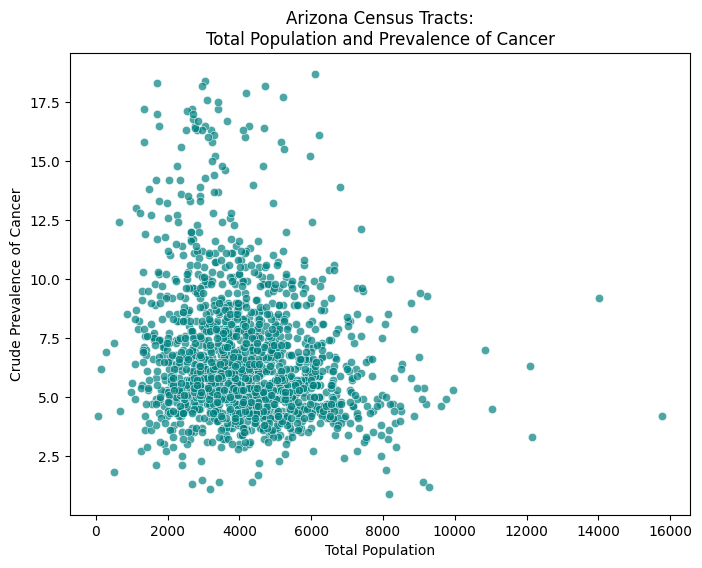

In [291]:
# Plot Total Population by Census Tract versus Crude Prevalence of Cancer - Scatterplot
plt.figure(figsize=(8,6))
sns.scatterplot(data=Geo_Merge, x="TotalPopulation",y="CANCER_CrudePrev",alpha = 0.7, color = 'teal')
plt.title('Arizona Census Tracts:\nTotal Population and Prevalence of Cancer')
plt.xlabel('Total Population')
plt.ylabel('Crude Prevalence of Cancer')
plt.show()

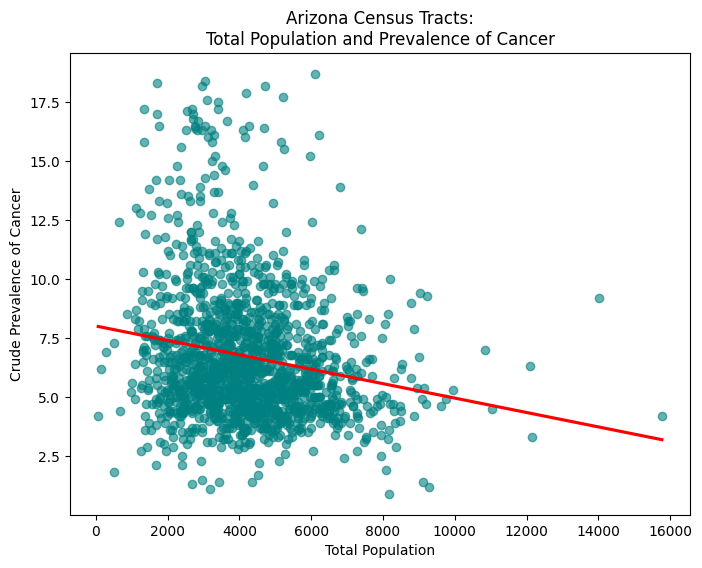

In [292]:
# Plot Total Population by Census Tract versus Crude Prevalence of Cancer - regplot
plt.figure(figsize=(8,6))
sns.regplot(data=Geo_Merge, x="TotalPopulation",y="CANCER_CrudePrev", scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'}, ci=None, color = 'teal')
plt.title('Arizona Census Tracts:\nTotal Population and Prevalence of Cancer')
plt.xlabel('Total Population')
plt.ylabel('Crude Prevalence of Cancer')
plt.show()

In [293]:
TractPopCancerCorr = Geo_Merge['TotalPopulation'].corr(Geo_Merge['CANCER_CrudePrev'])
print("Tract Correlation between Total Population and Crude Cancer Prevalence:","\n",TractPopCancerCorr)

Tract Correlation between Total Population and Crude Cancer Prevalence: 
 -0.1850145169194686


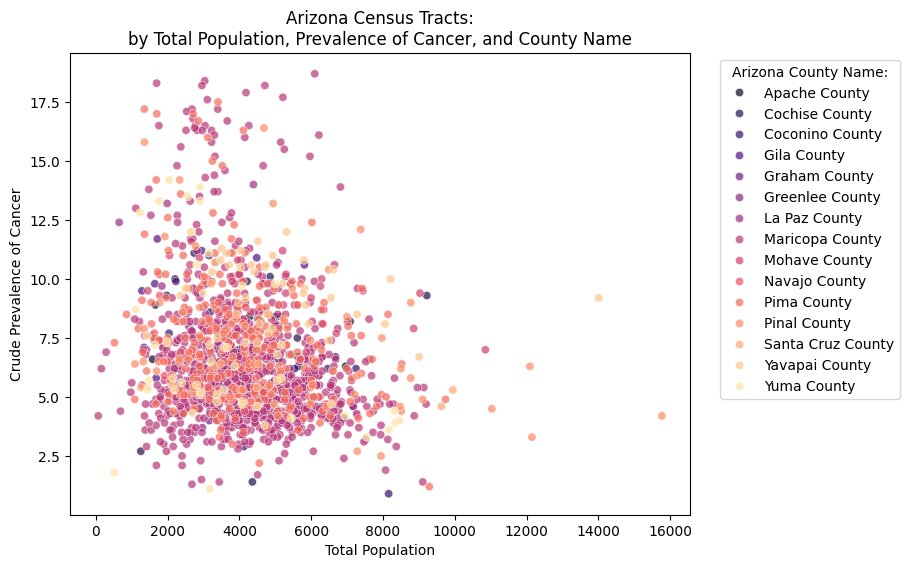

In [294]:
# Plot Total Population by Census Tract versus Crude Prevalence of Cancer
plt.figure(figsize=(8,6))
sns.scatterplot(data=Geo_Merge, x="TotalPopulation",y="CANCER_CrudePrev", hue="County", alpha = 0.7, palette = 'magma')
plt.title('Arizona Census Tracts:\nby Total Population, Prevalence of Cancer, and County Name')
plt.xlabel('Total Population')
plt.ylabel('Crude Prevalence of Cancer')
plt.legend(title='Arizona County Name:', loc = 'upper right', bbox_to_anchor = (1.35,1))
plt.show()

In [295]:
# Compare Pop2010 column with TotalPopulation column

# Compare Pop2010 and TotalPopulation columns, return True if match, False if no match:
Geo_Merge['PopCompare'] =  Geo_Merge['Pop2010'] == Geo_Merge['TotalPopulation']
print(Geo_Merge[['CensusTract','County','Pop2010','TotalPopulation','PopCompare']])

PopCompare_Counts = Geo_Merge['PopCompare'].value_counts()
print("\n","Number of Records based on PopCompare Value:","\n",PopCompare_Counts)

PopMatchFalse = Geo_Merge[Geo_Merge['PopCompare'] == False]
print("\n","Records where PopCompare Value is FALSE:","\n",PopMatchFalse[['CensusTract','County','Pop2010','TotalPopulation','PopCompare']])

      CensusTract         County  Pop2010  TotalPopulation  PopCompare
0      4001942600  Apache County     1578           1578.0        True
1      4001942700  Apache County     5628           5628.0        True
2      4001944000  Apache County     6043           6043.0        True
3      4001944100  Apache County     5870           5870.0        True
4      4001944201  Apache County     4010           4010.0        True
...           ...            ...      ...              ...         ...
1515   4027011700    Yuma County     1230           1230.0        True
1516   4027011800    Yuma County     8316           8316.0        True
1517   4027012100    Yuma County     1467           1467.0        True
1518   4027980005    Yuma County      502            502.0        True
1519   4027980006    Yuma County     3172           3172.0        True

[1520 rows x 5 columns]

 Number of Records based on PopCompare Value: 
 PopCompare
True     1516
False       4
Name: count, dtype: int64

 Records

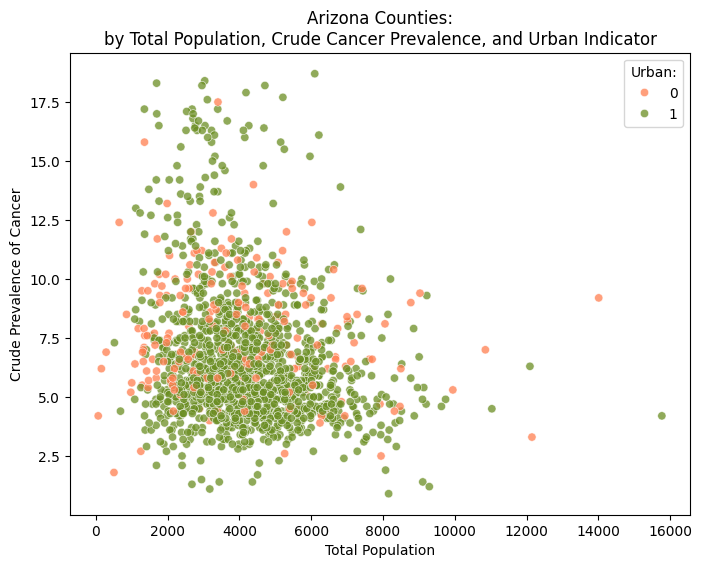

In [296]:
# Plot Total Population by Census Tract versus Crude Prevalence of Cancer based on Rural/Urban
Urban_Palette = ['coral','olivedrab']
plt.figure(figsize=(8,6))
sns.scatterplot(data=Geo_Merge, x="TotalPopulation",y="CANCER_CrudePrev", hue="Urban", alpha = 0.75, palette = Urban_Palette)
plt.title('Arizona Counties:\nby Total Population, Crude Cancer Prevalence, and Urban Indicator')
plt.xlabel('Total Population')
plt.ylabel('Crude Prevalence of Cancer')
plt.legend(title='Urban:', loc = 'upper right', bbox_to_anchor = (1,1))
plt.show()

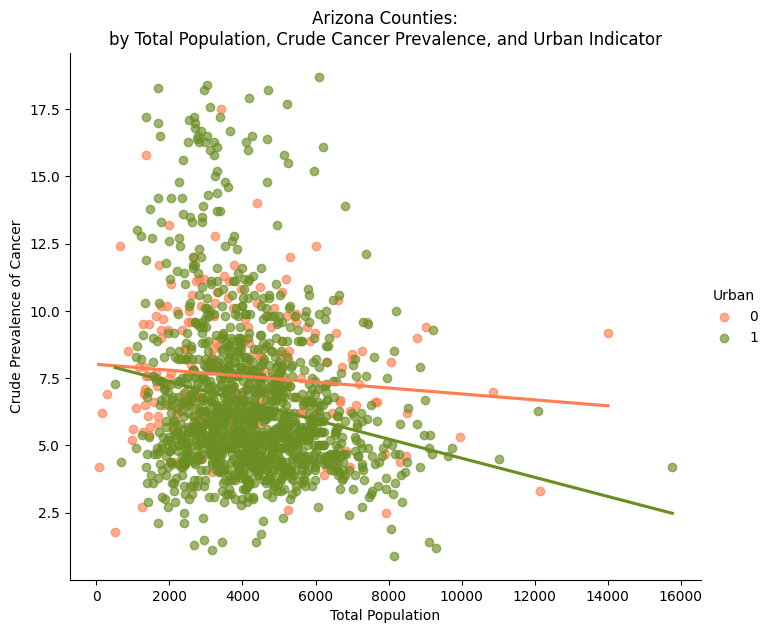

In [323]:
# Plot Total Population by Census Tract versus Crude Prevalence of Cancer based on Rural/Urban, lmplot
Urban_Palette = ['coral','olivedrab']
sns.lmplot(data=Geo_Merge, x="TotalPopulation",y="CANCER_CrudePrev", hue="Urban", palette = Urban_Palette, scatter_kws={'alpha': 0.65}, height = 6, aspect = 1.2, ci=None)
plt.title('Arizona Counties:\nby Total Population, Crude Cancer Prevalence, and Urban Indicator')
plt.xlabel('Total Population')
plt.ylabel('Crude Prevalence of Cancer')
plt.show()

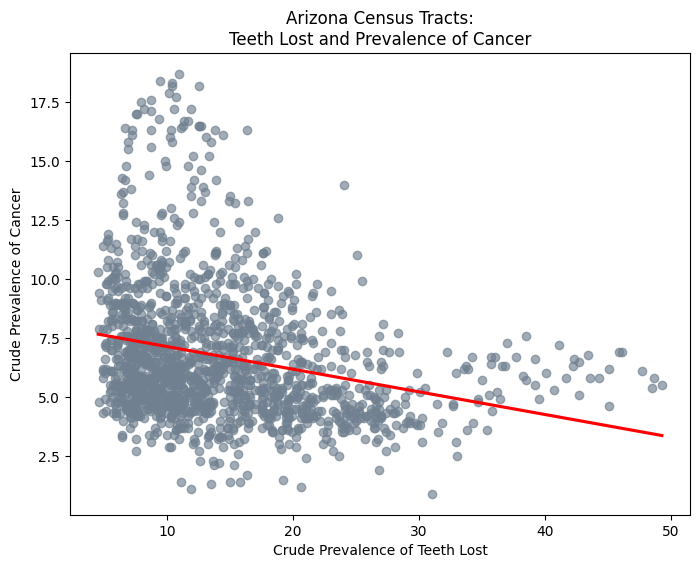

In [297]:
# TeethLost Crude Prev vs Cancer Crude Prev by CensusTract
plt.figure(figsize=(8,6))
sns.regplot(data=Geo_Merge, x="TEETHLOST_CrudePrev",y="CANCER_CrudePrev", scatter_kws={'alpha': 0.65}, line_kws={'color': 'red'}, ci=None, color='slategray')
plt.title('Arizona Census Tracts:\nTeeth Lost and Prevalence of Cancer')
plt.xlabel('Crude Prevalence of Teeth Lost')
plt.ylabel('Crude Prevalence of Cancer')
plt.show()

In [298]:
TractTeethCancerCorr = Geo_Merge['TEETHLOST_CrudePrev'].corr(Geo_Merge['CANCER_CrudePrev'])
print("Tract Correlation between Crude TeethLost Prevalence and Crude Cancer Prevalence:","\n",TractTeethCancerCorr)

Tract Correlation between Crude TeethLost Prevalence and Crude Cancer Prevalence: 
 -0.2560857204267746


In [299]:
# Filter df to exclude Maricopa County:
Geo_Merge_Filter = Geo_Merge[Geo_Merge['County'] != 'Maricopa County']
Geo_Merge_Filter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 607 entries, 0 to 1519
Columns: 210 entries, CensusTract to PopCompare
dtypes: bool(1), float64(156), int64(19), object(34)
memory usage: 996.5+ KB


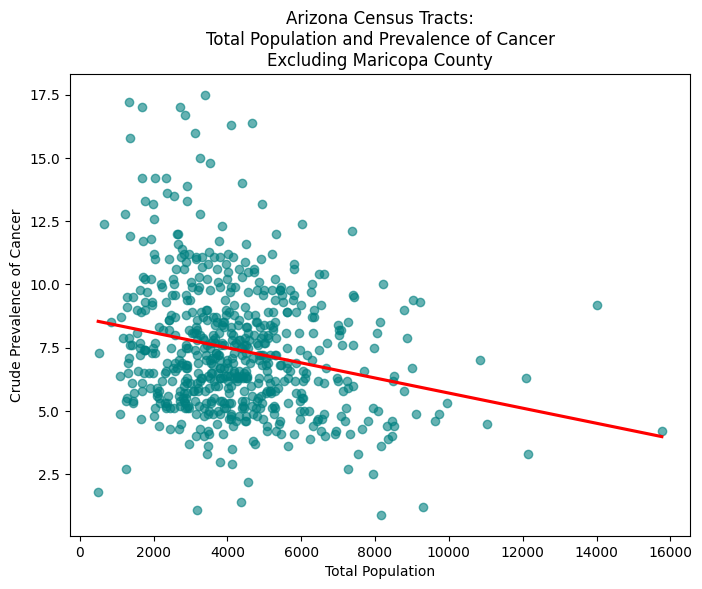

In [300]:
# Plot Total Population by Census Tract versus Crude Prevalence of Cancer, Excluding Maricopa County
plt.figure(figsize=(8,6))
sns.regplot(data=Geo_Merge_Filter, x="TotalPopulation",y="CANCER_CrudePrev", scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'}, ci=None, color = 'teal')
plt.title('Arizona Census Tracts:\nTotal Population and Prevalence of Cancer\nExcluding Maricopa County')
plt.xlabel('Total Population')
plt.ylabel('Crude Prevalence of Cancer')
plt.show()

In [301]:
TractPopCancerCorr_NoMar = Geo_Merge_Filter['TotalPopulation'].corr(Geo_Merge_Filter['CANCER_CrudePrev'])
print("Tract Correlation between Total Population and Crude Cancer Prevalence (Excl. Maricopa):","\n",TractPopCancerCorr_NoMar)

Tract Correlation between Total Population and Crude Cancer Prevalence (Excl. Maricopa): 
 -0.22605614084935402


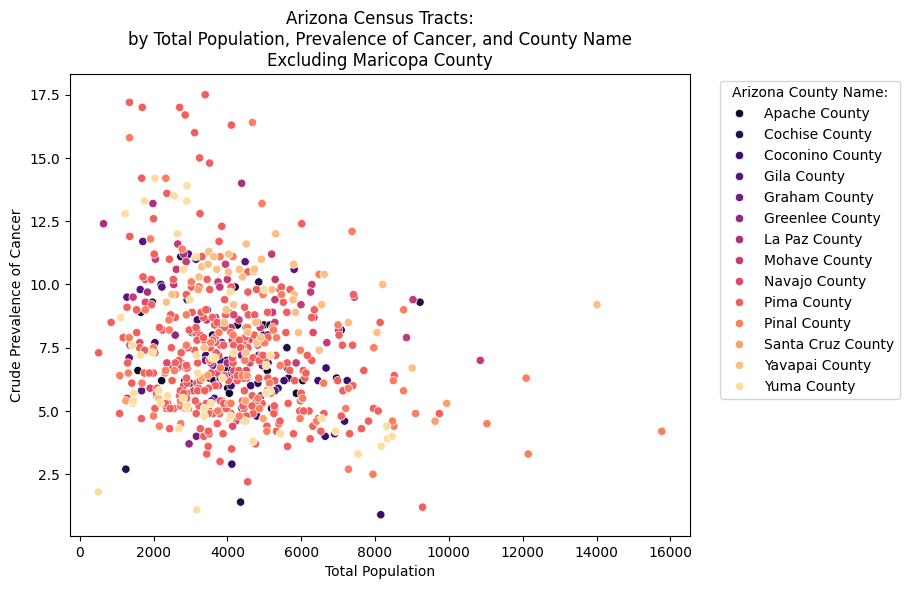

In [302]:
# Plot Total Population by Census Tract versus Crude Prevalence of Cancer, Excluding Maricopa County
plt.figure(figsize=(8,6))
sns.scatterplot(data=Geo_Merge_Filter, x="TotalPopulation",y="CANCER_CrudePrev", hue="County", palette = 'magma')
plt.title('Arizona Census Tracts:\nby Total Population, Prevalence of Cancer, and County Name\nExcluding Maricopa County')
plt.xlabel('Total Population')
plt.ylabel('Crude Prevalence of Cancer')
plt.legend(title='Arizona County Name:', loc = 'upper right', bbox_to_anchor = (1.35,1))
plt.show()

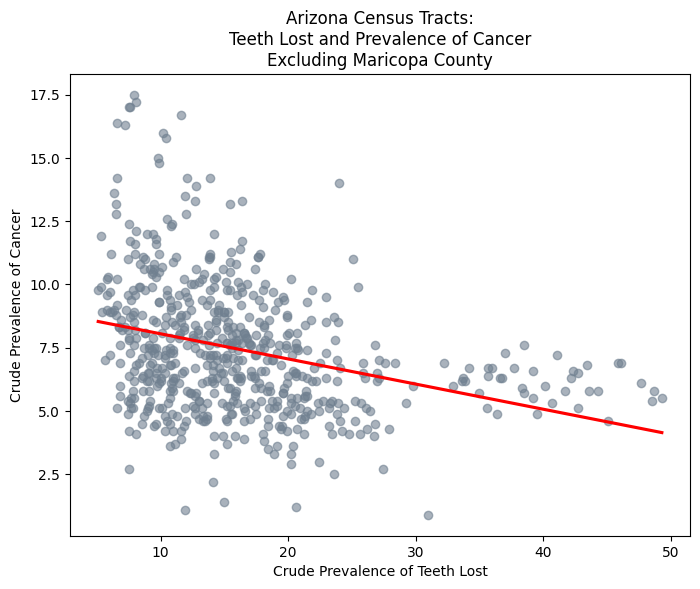

In [303]:
# TeethLost Crude Prev vs Cancer Crude Prev by CensusTract, Excluding Maricopa County
plt.figure(figsize=(8,6))
sns.regplot(data=Geo_Merge_Filter, x="TEETHLOST_CrudePrev",y="CANCER_CrudePrev", scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'}, ci=None, color='slategray')
plt.title('Arizona Census Tracts:\nTeeth Lost and Prevalence of Cancer\nExcluding Maricopa County')
plt.xlabel('Crude Prevalence of Teeth Lost')
plt.ylabel('Crude Prevalence of Cancer')
plt.show()

In [304]:
TractTeethCancerCorr2 = Geo_Merge_Filter['TEETHLOST_CrudePrev'].corr(Geo_Merge_Filter['CANCER_CrudePrev'])
print("Tract Correlation between Crude TeethLost Prevalence and Crude Cancer Prevalence, Excl Maricopa County:","\n",TractTeethCancerCorr2)

Tract Correlation between Crude TeethLost Prevalence and Crude Cancer Prevalence, Excl Maricopa County: 
 -0.3176173310060017


In [314]:
# Filter df to only include Race/Ethnicity and Cancer Col:
Geo_Merge_Race = Geo_Merge.copy()

# Keep only few columns:
Geo_Merge_Race = Geo_Merge_Race[['CensusTract','CANCER_CrudePrev','TractWhite','TractBlack','TractAsian','TractNHOPI','TractAIAN','TractOMultir','TractHispanic']]

#print(Geo_Merge_Race)

Geo_Merge_Race_Melt = Geo_Merge_Race.melt(
    id_vars=['CensusTract','CANCER_CrudePrev'],
    value_vars=['TractWhite','TractBlack','TractAsian','TractNHOPI','TractAIAN','TractOMultir','TractHispanic'],
    var_name='Race',
    value_name='Number of Individuals'
)

print(Geo_Merge_Race_Melt)

       CensusTract  CANCER_CrudePrev           Race  Number of Individuals
0       4001942600               6.6     TractWhite                   13.0
1       4001942700               6.7     TractWhite                   96.0
2       4001944000               6.2     TractWhite                  244.0
3       4001944100               5.7     TractWhite                   65.0
4       4001944201               5.9     TractWhite                  244.0
...            ...               ...            ...                    ...
10635   4027011700              12.8  TractHispanic                  214.0
10636   4027011800               4.4  TractHispanic                 5325.0
10637   4027012100               5.7  TractHispanic                  777.0
10638   4027980005               1.8  TractHispanic                  432.0
10639   4027980006               1.1  TractHispanic                  750.0

[10640 rows x 4 columns]


In [307]:
df = pd.DataFrame({
    'Day': ['Mon', 'Tue', 'Wed'],
    'Apple': [10, 15, 12],
    'Banana': [8, 11, 9]
})

print("Original DataFrame:")
print(df)

Original DataFrame:
   Day  Apple  Banana
0  Mon     10       8
1  Tue     15      11
2  Wed     12       9


In [311]:
melted_df = df.melt(
    id_vars=['Day'],           # Columns to keep as identifier variables
    value_vars=['Apple', 'Banana'], # Columns to unpivot
    var_name='Fruit',          # Name for the new variable column
    value_name='Quantity'      # Name for the new value column
)

print("\nMelted DataFrame:")
print(melted_df)


Melted DataFrame:
   Day   Fruit  Quantity
0  Mon   Apple        10
1  Tue   Apple        15
2  Wed   Apple        12
3  Mon  Banana         8
4  Tue  Banana        11
5  Wed  Banana         9
